In [2]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Scaffolds import MurckoScaffold
import csv

In [3]:
suppl_ligands = Chem.SDMolSupplier('../ohusak/Data/actives_final.sdf')
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]
ligands = [m for m in suppl_ligands if m]

[13:29:27] Explicit valence for atom # 7 N, 4, is greater than permitted
[13:29:27] ERROR: Could not sanitize molecule ending on line 20009
[13:29:27] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[13:29:28] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:29:28] ERROR: Could not sanitize molecule ending on line 250947
[13:29:28] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:29:28] Explicit valence for atom # 17 O, 3, is greater than permitted
[13:29:28] ERROR: Could not sanitize molecule ending on line 258130
[13:29:28] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[13:29:28] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:29:28] ERROR: Could not sanitize molecule ending on line 261581
[13:29:28] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:29:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11 12 13 14 15 16 17
[13:29:28] ERROR: Coul

[13:29:29] Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20
[13:29:29] ERROR: Could not sanitize molecule ending on line 557517
[13:29:29] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20
[13:29:29] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
[13:29:29] ERROR: Could not sanitize molecule ending on line 561344
[13:29:29] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
[13:29:29] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 19
[13:29:29] ERROR: Could not sanitize molecule ending on line 562947
[13:29:29] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 19
[13:29:29] Explicit valence for atom # 27 N, 4, is greater than permitted
[13:29:29] ERROR: Could not sanitize molecule ending on line 567073
[13:29:29] ERROR: Explicit valence for atom # 27 N, 4, is greater than permitted
[13:29:29] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 15 16 17
[13:29:29] ERROR: Could not sanitize molecule ending on line 568252
[13

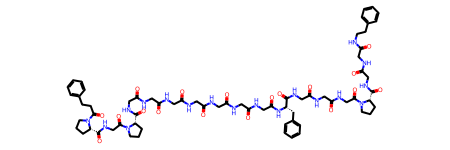

In [4]:
scaff = MurckoScaffold.GetScaffoldForMol(drugs[0])
scaff

In [69]:
scaffolds = []
for l in ligands:
    scaffolds.append(scaffold(l))

In [70]:
scaffolds_drug = []
for l in drugs:
    scaffolds_drug.append(scaffold(l))

In [27]:
def scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol) # get rid of stereo, doesn't matter much in scaffolds
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(mol) # all atoms->C all bonds-> single
    except ValueError: # if the structure can't be represented by C atoms, just return no scaffold.
        # if such functionality is really desired, then generic graphs can be used instead of C
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff) # remove all sidechains
    smile = Chem.MolToSmiles(scaff)
    return smile

In [19]:
Chem.MolToSmiles(scaffolds[0])

'C1CCC(C2CCCCC2CCC2CCCC2)CC1'

In [22]:
from collections import Counter

In [67]:
c=Counter(scaffolds)
c.keys()

dict_keys(['C1CCC(C2CCCCC2CCC2CCCC2)CC1', 'C1CCC(CCC2CCCC2C2CCCCC2)CC1', 'C1CCC(C2CCCCC2CC2CCCC2)CC1', 'C1CCC(CC2CCC(C3CCCCC3)C(CC3CCCCC3)C2)CC1', 'C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1', 'C1CCC(CC2CC(CC3CCC(C4CCC5CCCCC5C4)C3)C3CCCCC23)CC1', 'C1CCC(CC2CCCC2)CC1', 'C1CCC(C2CCCC2CC2CCCC2)CC1', 'C1CCC(CC2CCCC3CCCCC32)CC1', 'C1CCC(C2CCCC2CC2CCC2)CC1', 'C1CCC(C2CC(C3CCCCC3)C(C3CCCC3)C2)CC1', 'C1CCC(CC2CCC(C3CCCCC3)C(C3CCCCC3)C2)CC1', 'C1CCC(C2CC3(CCCC3)C2C2CCCCC2)CC1', 'C1CCC(C2CC(C3CCCCC3)C3CCCCCC23)CC1', 'C1CCC(CCC2CCC3CCCC3C2)C1', 'C1CCC(CCC2CCCCC2)CC1', 'C1CCC(C2CC3CCCCC3C(C3CCCCC3)C2C2CCCCC2)CC1', 'C1CCC(C2CCCC2C2CCC3CCCCC3C2)CC1', 'C1CCC(C2CC3CCCCC3CC2C2CCCCC2)CC1', 'C1CCC(CC2CCC3CCCC3C2)CC1', 'C1CCC(CC2CCCC2C2CCCCC2)CC1', 'C1CCC(C2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1', 'C1CCC(CCC2CCCC3CCCCC32)CC1', 'C1CCC(C2CCCC2)CC1', 'C1CCC(C2CCCCC2C2CCCCC2)CC1', 'C1CCC2CC3C(CC2C1)CC1CCCCC13', 'C1CCC(CCC2CCCC2)CC1', 'C1CCC(CC2CCC3CCCC3C2)C1', 'C1CCC(C2CCCC2C2CCCC2)CC1', 'C1CCC(C2CC3CCCCC3C2C2CCCCC2)CC1'

In [39]:
import pandas as pd

In [71]:
df = pd.DataFrame(c.items())
df['percents'] = (df[1] / len(scaffolds))*100
df.sort_values('percents', ascending=False)

,0,1,percents
146,C1CCCCC1,1041,196.045198
175,,976,183.804143
41,C1CCC(CC2CCCCC2)CC1,199,37.476460
87,C1CCC2CCCC2C1,194,36.534840
48,C1CCCC1,190,35.781544
...,...,...,...
815,C1CCC(CCCC2CCC(C3CC4CCCCC4CC3C3CCCCC3)CC2)CC1,1,0.188324
814,C1CCC(CCCC2CCC(CCCC(C3CCCCC3)C3CCCCC3)CC2)CC1,1,0.188324
813,C1CCC(C(CCC2CCCC3CCCCC32)C2CCCCC2)CC1,1,0.188324
811,C1CCC(CC2CCCC(CCCCCC3CC4CCCCC4C3)CC2)CC1,1,0.188324


In [76]:
len(scaffolds_drug)

7115

In [77]:
len(cd.keys())

1546

In [72]:
cd=Counter(scaffolds_drug)
dfd = pd.DataFrame(cd.items())
dfd['percents'] = (dfd[1] / len(scaffolds_drug))*100
dfd.sort_values('percents', ascending=False)

,0,1,percents
6,C1CCCCC1,1039,14.602952
11,,976,13.717498
16,C1CCC2CCCC2C1,192,2.698524
9,C1CCCC1,188,2.642305
43,C1CCC(CC2CCCCC2)CC1,182,2.557976
...,...,...,...
718,C(CCCCC1CCCC1)CCCC1CCCCC1,1,0.014055
717,C1CCC(CCC2CCCC(CC3CCCC(C4CCCCC4)C3)C2)CC1,1,0.014055
716,C1CCC(CCC2CCC3CC(CC4CCCC(CC5CCC6CC(CCC7CCCCC7)...,1,0.014055
715,C1CC2CCC1CC2,1,0.014055


In [79]:
int_df = pd.merge(df, dfd, how ='inner', on =[0])
int_df.dropna(inplace=True)
print(int_df)

                                                      0  1_x  percents_x  1_y  \
0                           C1CCC(C2CCCCC2CCC2CCCC2)CC1    3    0.564972    2   
1                           C1CCC(CCC2CCCC2C2CCCCC2)CC1    5    0.941620    3   
2               C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1   10    1.883239    1   
3                                    C1CCC(CC2CCCC2)CC1   89   16.760829   74   
4                             C1CCC(CC2CCCC3CCCCC32)CC1   31    5.838041   26   
...                                                 ...  ...         ...  ...   
1541   C1CCC(CC2CCC(CC3CCCC4CC5CC6CCCCC6CC5CC34)CC2)CC1    1    0.188324    1   
1542  C1CCC(CCCCC2CC(CC3CCCCC3)C3CC4CC5CCCCC5CC4CC3C...    1    0.188324    1   
1543                      C1CCC(C2CC3CCCC4CCCCC2C43)CC1    1    0.188324    1   
1544                 C1CCC(CCC2CCCCC2)CC1.C1CCC2CCCC2C1    1    0.188324    1   
1545  C1CCC2C(C1)CCC2C1CCCC1.C1CCCCC1.C1CCCCC1.C1CCCCC1    1    0.188324    1   

      percents_y  
0       